## Depth First Search (DFS)
### General

In [3]:
from typing import List

* In graph theory, DFS is mainly used to:
  + travel all vertices in a graph
  + traverse all paths between any two vertices in a graph 

* traverse all vertices
  + algorithm
    + start from a vertex. when traversing each vertex, add all the vertices it connects to the stack
    + pop up from the stack, and check if the popped vertex has been visited, if not, add it to the results, and add its connected vertices to the stack. Otherwise, ignore the vertex
    + repeat until all the vertices have been visited
  
  + time complexity: V+E (traverse all the vertices and edges)
  + space complexity: V
  
* find out all the paths between two vertices, A and B
  + algorithm
    + start from vertex A, since it hasn't been visited, add all edges of A to the stack, and mark A as visited
    + pop up the edge, and check if this edge connects A and B, if so, we find one solution, otherwise, we mark the vertex as visited and find all edges from it. 
      + each time, we check if the vertex is marked as visited, if so, ignore it, otherwise, put the edge in the stack, until we find B, or if all of its connected edges have been marked, ignore the vertex
      + each time when B is reached, add the path to results, and unmark the vertices on the path to look for other solutions
  + time complexity: O((V-1)!) since at the fixed starting and ending vertices, there are (V-2)! possible paths to connect these two vertices, and each path is about v-1 steps so finally will have (v-1)! steps    

#### Leetcode 1971 Find if Path Exists in Graph
* Overview
  + There is a bi-directional graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive). The edges in the graph are represented as a 2D integer array edges, where each `edges[i] = [ui, vi]` denotes a bi-directional edge between vertex ui and vertex vi. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.
  + You want to determine if there is a valid path that exists from vertex source to vertex destination.
  + Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.
* find if a path exists between two vertices
* typeical DFS
* establish the adj_list using list
* recursive implementation
  + test if the vertex is the destination, if so, return True
    + otherwise, traverse the current vertex's neighours, and if a neighbor is not visited, add it to the set , and recursively call dfs of the neighor. 
      + If dfs returns True, return True 
      + if all neighbors return False, return False
* stack implementation   
  + basic idea is the same, but the speed and memory have much better performance

In [ ]:
# stack implementation
class Solution:
    def validPath(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        if n == 1:
            return True
        
        adj_list = [[] for _ in range(n)]
        for start, end in edges:
            adj_list[start].append(end)
            adj_list[end].append(start)
            
        visited = set([source]) 
        stack =[source]

        while stack:
            curr = stack.pop()
            if curr == destination:
                return True

            for neigh in adj_list[curr]:
                if neigh not in visited:
                    visited.add(neigh)
                    stack.append(neigh)

        return False            
    
# recursive implementation   
class Solution:
    def validPath(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        if n == 1:
            return True
        
        adj_list = [[] for _ in range(n)]
        for start, end in edges:
            adj_list[start].append(end)
            adj_list[end].append(start)
            
        visited = set()    
            
        def dfs(start: int) -> bool:            
            if start == destination:
                return True            
            
            for end in adj_list[start]:
                if end not in visited:
                    visited.add(end)
                    if dfs(end):
                        return True
                    
            return False
        
        return dfs(source)
                
        

#### Leetcode 797 All Paths From Source to Target
* Overview
  + Given a directed acyclic graph (DAG) of n nodes labeled from 0 to n - 1, find all possible paths from node 0 to node n - 1 and return them in any order.
  + The graph is given as follows: `graph[i]` is a list of all nodes you can visit from node i (i.e., there is a directed edge from node i to node `graph[i][j]`).
* it is easier to use recursive in the problem
* notice that the problem already mentioned the graph is a DAG, so there is no cycles
  + this means we don't need to consider the reuse of vertices, and there is no need to set up visited set
* directly use dfs 
* time complexity:
  + O(2^V * V)
  + each intermediate vertex has two options, so at the order of 2^V, and each path takes V steps to construct
* space complexity:
  + ignore the output array's space, each dfs pathway will go at most V steps, so it is O(V)  

In [2]:
from typing import List
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        if not graph:
            return []
        
        rs = []
        n = len(graph)
        
        
        def dfs(curr: int, temp_rs: List[int]) -> None:
            if curr == n-1:
                rs.append(temp_rs)
                return
            
            for neigh in graph[curr]:
                dfs(neigh, temp_rs+[neigh])
                    
                    
        dfs(0, [0])
        return rs
            

#### Leetcode 133 Clone graph
* first traverse all the vertices and edges to create cloned nodes (don't create duplicated nodes) using a stack and while loop (DFS stack implementation + hashmap)
* in DFS, we input the original node and add the cloned node to node_map, check the neighbors, if not created, then recursively call dfs to create all unique cloned node
* Each cloned node is stored as value of a node_map dictionary, using the corresponding original node as the key
* traverse the keys of node_map, and attach neighbors for each cloned node using node_map
* return the node

In [3]:
# DFS with stack implementation
class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if not node:
            return None
        
        stack = [node]
        node_map = {}
        
        while stack:
            curr = stack.pop()
            node_map[curr] = Node(val=curr.val)        
            for neigh in curr.neighbors:
                if neigh not in node_map:
                    stack.append(neigh)
                    
        for original_node in node_map:
            for n in original_node.neighbors:
                node_map[original_node].neighbors.append(node_map[n])

        return node_map[node]  
    
# DFS
class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if not node:
            return None
        
        node_map = {}

        def dfs(node: 'Node') -> None:
            node_map[node] = Node(node.val)

            for neigh in node.neighbors:
                if neigh not in node_map:
                    dfs(neigh)

        dfs(node)   

        for original_node in node_map:
            for ng in original_node.neighbors:
                node_map[original_node].neighbors.append(node_map[ng])   

        return node_map[node]                

#### Leetcode 332 Reconstruct Itinerary
* the problem gives a set of tickets with from and to cities, and ask you to compile an itinerary that will include all the travels 
+ To clarify, this is not a DAG, since we could find at least a cycle in the graph
* the graph could even have some duplicate deges (we might have multiple flights with the same origin and destination)
* we use Hierholzer' algorithm based on Eulerian path
  + an Eulerian trail (or Eulerian path) is a trail in a finite graph that visits every edge exactly once (allowing for revisiting vertices).
  + In 1873, Hierholzer proposed an efficient algorithm to find the Eulerian cycle in linear time (O(∣E∣)
  
* To summarize, the main idea to find the Eulerian path consists of two steps:
  + Step 1). Starting from any vertex, we keep following the unused edges until we get stuck at certain vertex where we have no more unvisited outgoing edges.
  + Step 2). We then backtrack to the nearest neighbor vertex in the current path that has unused edges and we repeat the process until all the edges have been used.
  + The first vertex that we got stuck at would be the end point of our Eulerian path. So if we follow all the stuck points backwards, we could reconstruct the Eulerian path at the end.

* in solution, we first sort the neighbors in reversed order, so each time, the smallest string will be popped first, and store in deeper in the recursive stack, and finally, append to the end of result list. When we return the results in reversed order, we get the correct order.
* we have to use the double reverse operation. We invoke the dfs using JFK as the starting point, and will get this starting point as the last element in the output result. Using the reversed order of this list will give us the correct order, with JFK as the starting stop.

* time complexity
  + O(Vlog(V/E))
  + we traverse each edge, which is O(V)
  + when constructing the graph, we need to sort each adjacent list. Assuming an even distribution of the edges among vertices, each vertex will have E/(2V) elements to sort, resulting in O((E/V)log(E/V)) for each vertex. Considering all the vertices, the time complexity is O(Elog(E/V)). This dominates the O(V) part, and therefore, the overall time complexity is O(Elog(E/V))
* space complexity
  + O(V+E) we store each vertex with their edges
* Note from [huahua's video](https://zxi.mytechroad.com/blog/graph/leetcode-332-reconstruct-itinerary/). We can consider the traverse as a post order traverse of an n-ary tree, with its children ordered, from the smallest to the biggest children order by alphabetic order, and append each node to result list during the traverse. The implementation is the same as introduced here, but is easier to understand if we consider the process as a post order tree traversal  
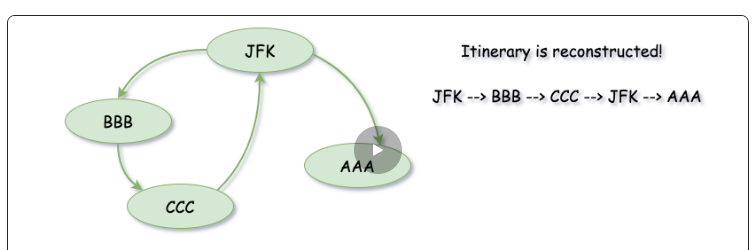

In [5]:
from typing import List
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        if not tickets:
            return []
        
        rs = []
        
        ticket_map = defaultdict(list)
        for start, end in tickets:
            ticket_map[start].append(end)
            
        for key in ticket_map:
            # the smaller city will be visited first, and 
            # be buried deeper in recursive stack
            ticket_map[key].sort(reverse=True)
            
        def dfs(start):
            # only when all its adj-list is empty, we write it out
            while ticket_map[start]:
                dfs(ticket_map[start].pop())
                
            rs.append(start)
            
        dfs("JFK") 
        
        return rs[::-1]
        

#### Leetcode 1059: All paths from scource lead to destination
* Overview
  + Given the edges of a directed graph where `edges[i] = [ai, bi]` indicates there is an edge between nodes ai and bi, and two nodes source and destination of this graph, determine whether or not all paths starting from source eventually, end at destination, that is:
    + At least one path exists from the source node to the destination node
    + If a path exists from the source node to a node with no outgoing edges, then that node is equal to destination.
    + The number of possible paths from source to destination is a finite number.
  + Return true if and only if all roads from source lead to destination.
  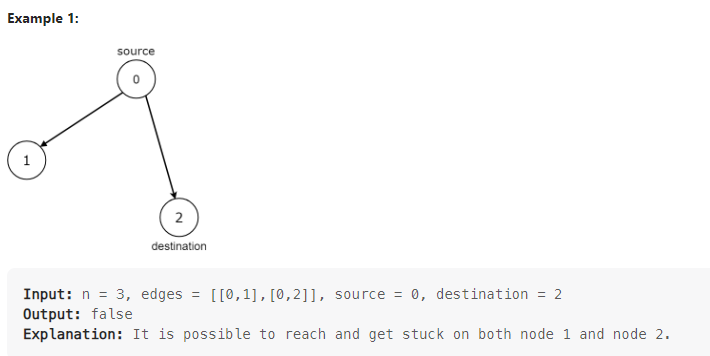
* this is a white, grey and black status dfs. The purpose is to
  + detect the cycles in all paths
* the basic idea is the following:
  + all vertices are initialized to be in status white, indicating that they haven't been visited
  + then call dfs(current node)
    + first check if the current vertex has outgoing edges, if not, then return True if it is destination, otherwise, returns False
    + if the current vertex is white, change its status to grey, and then recursively call its neighbors
      + if all of its neighbors returns True by dfs, then mark the current vertext as Black, and return True
    + if the current vertex is grey, meaning the same vertex has been visited in the same traverse, then returns False
    + if the current vertex is black, since all its outgoing edges have returned True, we return True  

In [5]:
from enum import Enum
class Status(Enum):
    WHITE = 0
    BLACK = 1
    GREY = 2
    
class Solution:
    def leadsToDestination(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        
        states = [Status.WHITE] * n
        
        adj_list = [[] for _ in range(n)]
        for start, end in edges:
            adj_list[start].append(end)
            
        
        def dfs(curr: int) -> bool:
            # there should be only one node without outgoing edges
            # and this node must be the destination
            if not adj_list[curr]:
                return curr == destination
            
            if states[curr] == Status.BLACK:
                return True
            
            if states[curr] == Status.GREY:
                return False
            
            if states[curr] == Status.WHITE:
                states[curr] = Status.GREY
                        
            # if all curr's edges have been tested
            # set its status to BLACK and returns True
            for ng in adj_list[curr]:                
                if not dfs(ng):
                    return False
            states[curr] = Status.BLACK
                
            return True 
        
        return dfs(source)